#  <u>*Auto Mobile Analysis .*</u>

## <u>*Analysis objective*</u>
### *To predict the Auto Mobile Prices based on given features inputs*

---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')

## *Importing data*

In [4]:
df=pd.read_csv(r"./DataSet/automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## *Data shape*

In [5]:
df.shape

(205, 26)

## *Data info*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

---

## *Data Cleaning*

*A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [7]:
import janitor
df=df.clean_names()

*B. Replaing "?" symbol with nan-value :*

In [8]:
df=df.replace("?",np.nan)

*C. na-values :*

In [9]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*-- We will replce the NA Values wuth randomly selcted values for the same dataset*

In [10]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

*D. converting features into desired Data Type:*

In [11]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

---

*Saving the new cleaned dataset*

In [13]:
df.to_csv(r"./DataSet/new_cleaned_df.csv", index=False)

## *Exploratory Data Analysis - EDA*

*A. categorical & numerical_features:*

In [14]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [15]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 16 numerical features : ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
we have 10 categorical features : ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


*B. Basic data statistics:*

* *Numerical data statistics :*

In [16]:
pd.DataFrame(numerical_features).describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,205.0,123.156098,35.171638,65.00,95.00,118.00,150.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.331707,0.274082,2.54,3.15,3.31,3.59,3.94
stroke,205.0,3.250341,0.318484,2.07,3.11,3.29,3.41,4.17


* *Categorical data statistics :*

In [17]:
pd.DataFrame(categorical_features).describe().T

,count,unique,top,freq
make,205,22,toyota,32
fuel_type,205,2,gas,185
aspiration,205,2,std,168
num_of_doors,205,2,four,114
body_style,205,5,sedan,96
drive_wheels,205,3,fwd,120
engine_location,205,2,front,202
engine_type,205,7,ohc,148
num_of_cylinders,205,7,four,159
fuel_system,205,8,mpfi,94


*C. EDA - Data Visualization:*

* *Numerical features Visualization :*

In [18]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features):
    nrows = 4
    ncols = 4

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind="box")

    plt.tight_layout()
    plt.show()


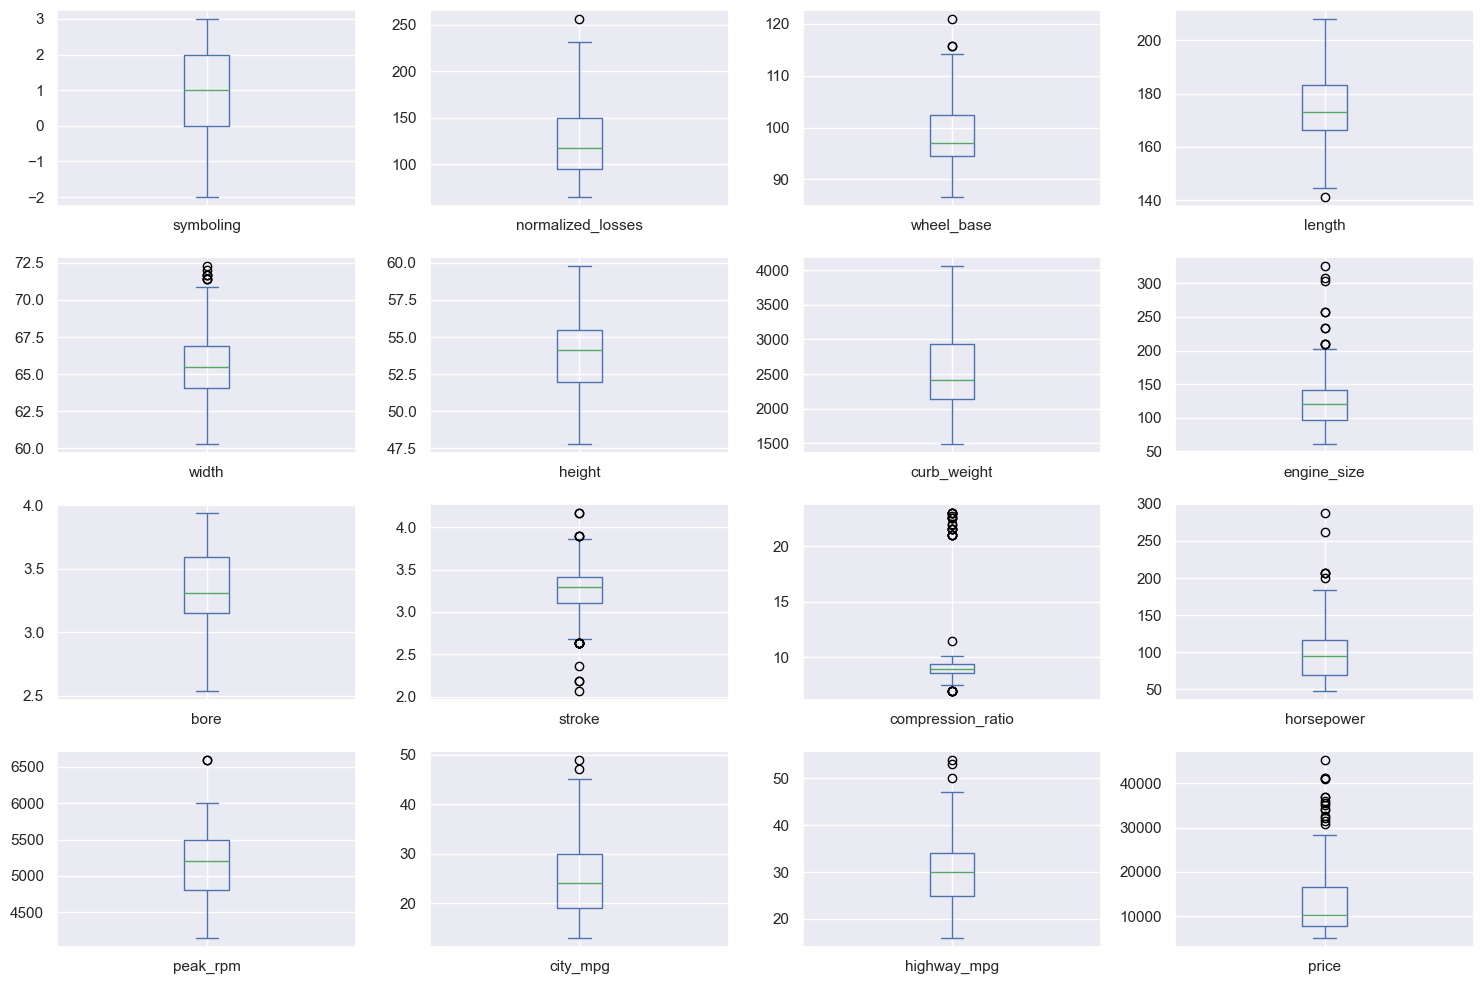

In [19]:
plot_numerical_features(numerical_features)

 * *we can see that some faetures looks like it has outliers except (sympoling,bore,height,curb_wieght)  features, but when we have a close look at these data points we can see that these points are not close to the 4th quantule range and not extremnly vary*

In [20]:
for i in numerical_features:
    if i in ['normalized_losses', 'wheel_base', 'width','engine_size', 'stroke','compression_ratio','horsepower', 'peak_rpm', 'city_mpg','highway_mpg', 'price']:
        print(numerical_features[i].sort_values(ascending=False).head(10),"\n","--"*10)

190    256
106    231
109    231
179    197
178    197
105    194
104    194
10     192
11     192
13     188
Name: normalized_losses, dtype: int64 
 --------------------
73     120.9
70     115.6
71     115.6
114    114.2
113    114.2
109    114.2
110    114.2
48     113.0
47     113.0
74     112.0
Name: wheel_base, dtype: float64 
 --------------------
129    72.3
74     72.0
71     71.7
70     71.7
73     71.7
7      71.4
8      71.4
6      71.4
17     70.9
49     70.6
Name: width, dtype: float64 
 --------------------
49    326
73    308
74    304
48    258
47    258
71    234
72    234
16    209
17    209
15    209
Name: engine_size, dtype: int64 
 --------------------
47     4.17
48     4.17
29     3.90
130    3.90
131    3.90
84     3.86
83     3.86
124    3.86
82     3.86
69     3.64
Name: stroke, dtype: float64 
 --------------------
192    23.0
184    23.0
182    23.0
187    23.0
203    23.0
63     22.7
174    22.5
158    22.5
159    22.5
66     22.0
Name: compression_ratio, 

* *Categorical features Visualization :*

In [21]:
# creating one function for plotting categorical_features
def plot_categorical_features(categorical_features):
    nrows = 3
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 7))

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax, title=column)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        
    plt.tight_layout()
    plt.show()

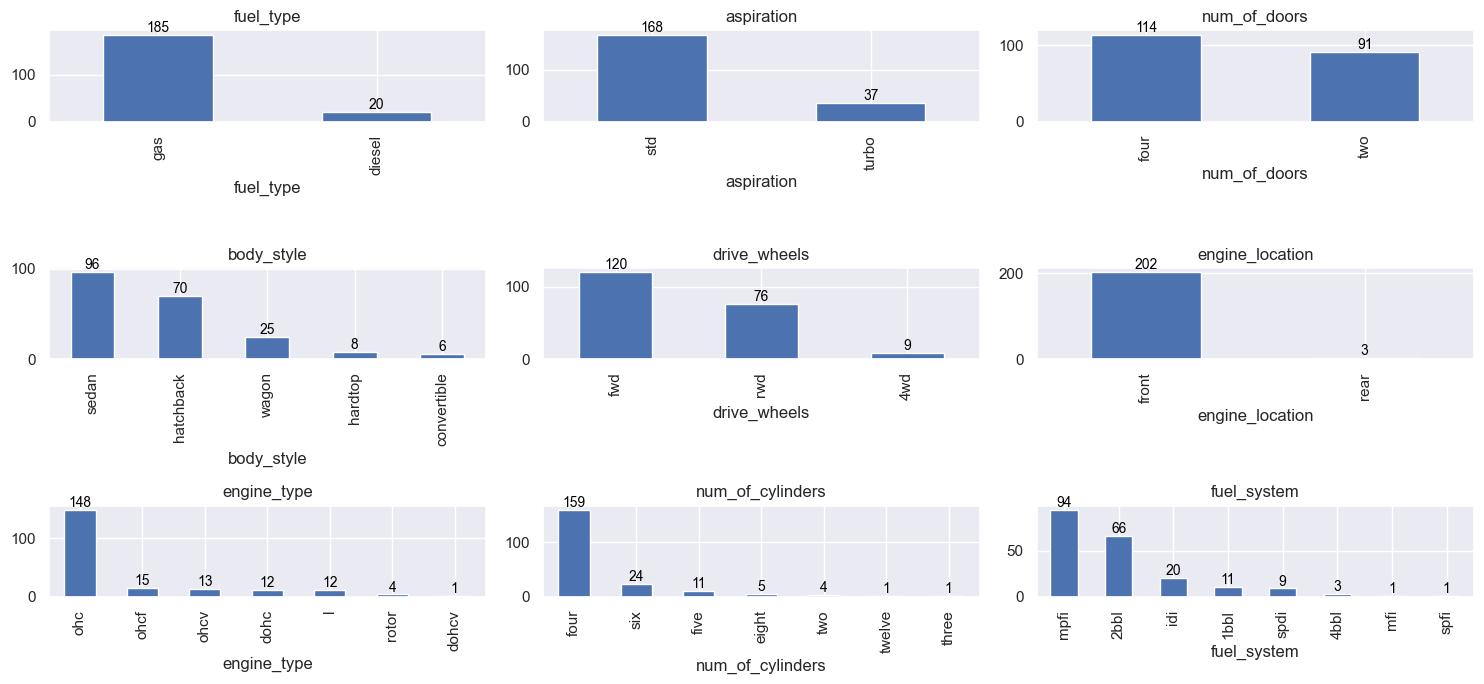

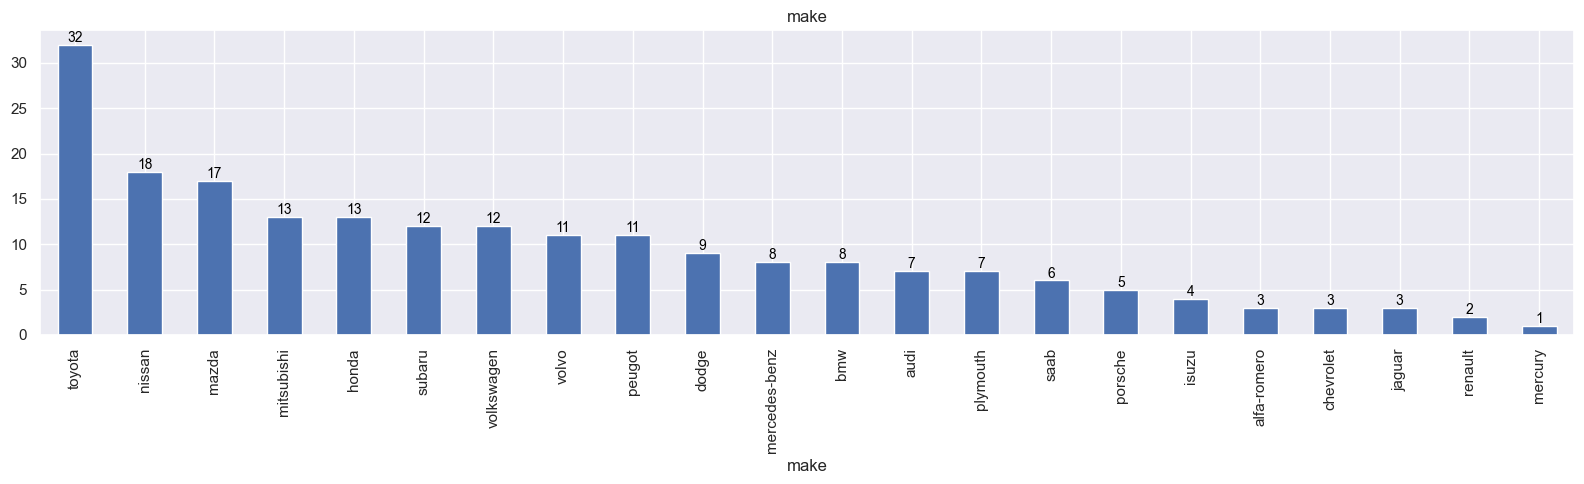

In [22]:
plot_categorical_features(categorical_features.iloc[:,1:])
counts = categorical_features["make"].value_counts()
ax = counts.plot(kind='bar', figsize=(16, 5), title="make")
for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )

plt.tight_layout()
plt.show() 


*C. EDA Correlation*

* *Correlation - price as target fetaure*

* *As the data are not normally ditributed we will use spearman meathos*

In [23]:
numerical_features.corr(method="spearman")["price"]

symboling           -0.138561
normalized_losses    0.183009
wheel_base           0.654566
length               0.762947
width                0.761682
height               0.243053
curb_weight          0.860045
engine_size          0.784153
bore                 0.616251
stroke               0.080575
compression_ratio   -0.135907
horsepower           0.807878
peak_rpm            -0.074308
city_mpg            -0.773651
highway_mpg         -0.771614
price                1.000000
Name: price, dtype: float64

* *Correlation -heatmap- price as target fetaure*

<Axes: >

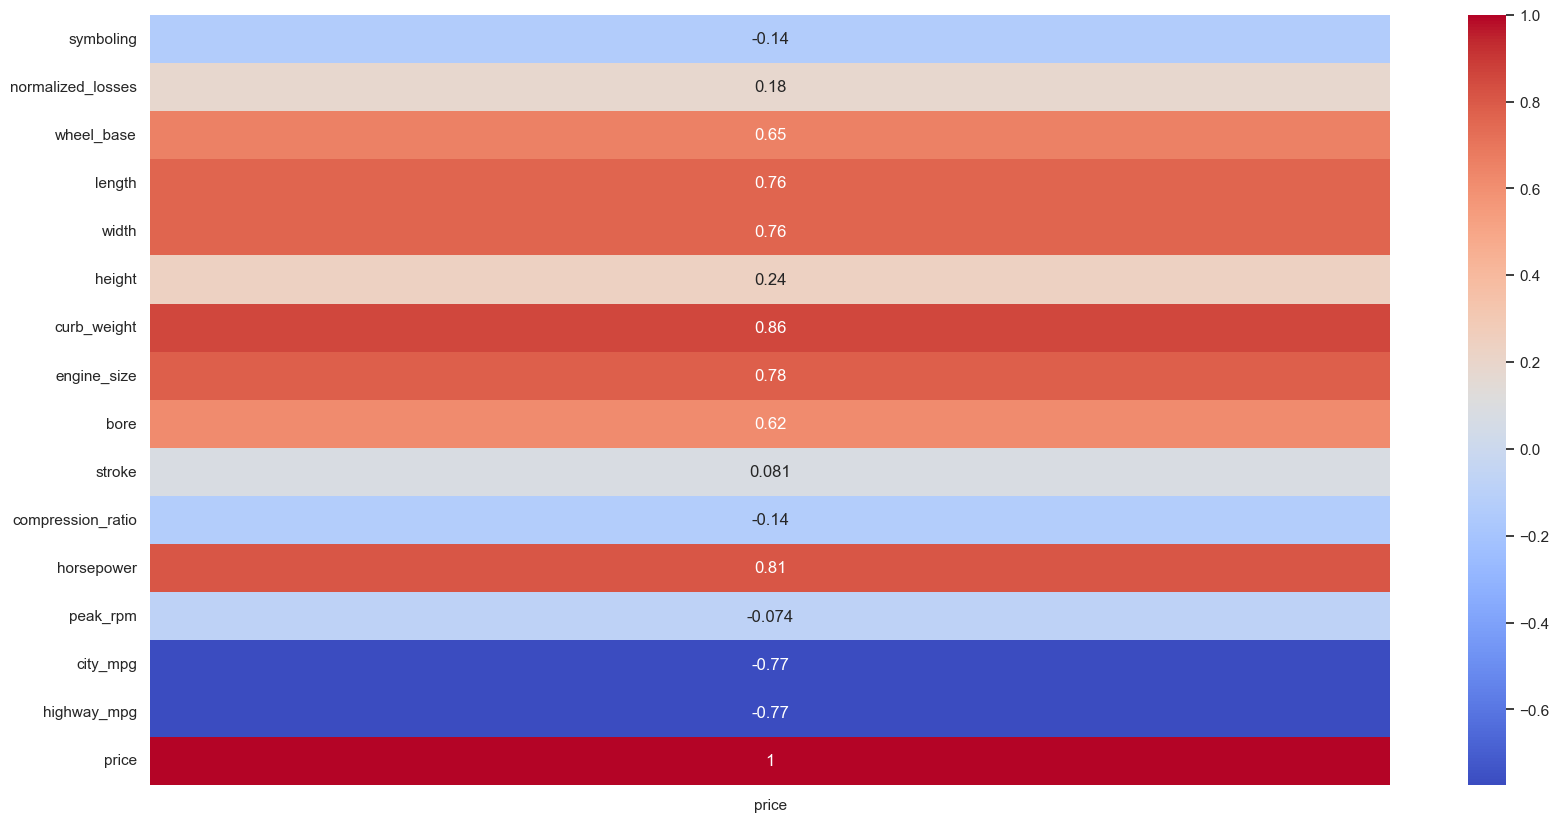

In [24]:
sns.heatmap((numerical_features.corr(method="spearman")["price"]).to_frame(),annot=True,cmap='coolwarm')

* *Correlation -scatterplot- price as target fetaure*

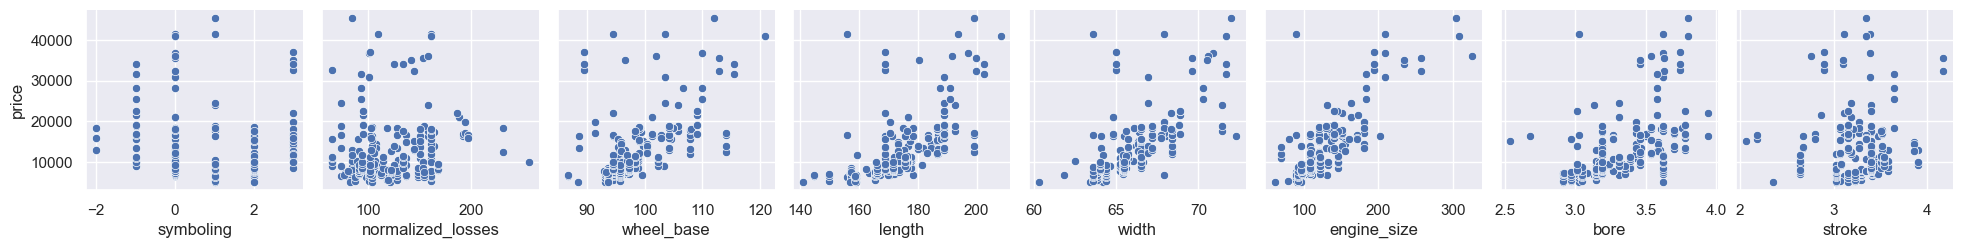

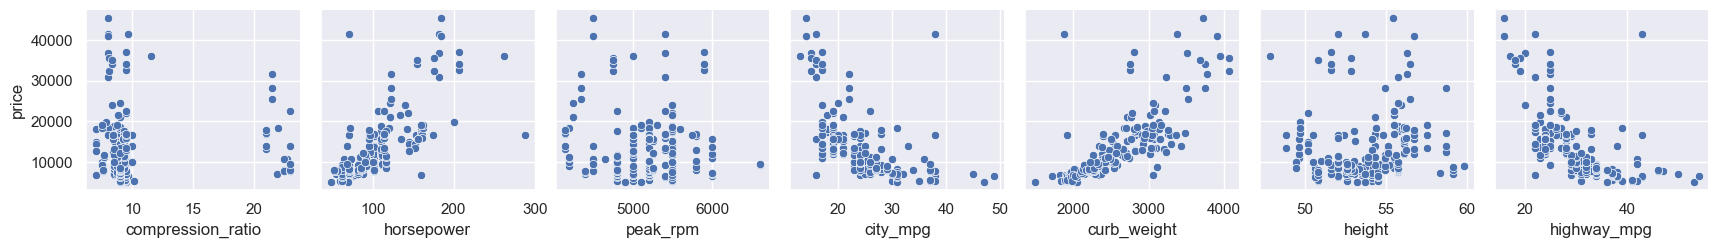

In [25]:
sns.pairplot(data=numerical_features,
             x_vars=['symboling', 'normalized_losses', 'wheel_base', 'length', 'width','engine_size', 'bore', 'stroke'],
             y_vars='price');

sns.pairplot(data=numerical_features,
             x_vars=['compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg','curb_weight','height','highway_mpg'],
             y_vars='price');

---

## *Data Modelling*

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tqdm import tqdm
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK,Trials
from tqdm import tqdm

*Date preprocessing*

In [31]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

df.head()
        

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,161,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,104,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,158,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


In [33]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,83,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,94,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


*Define x and y*

*Splitting data into training and testing subsets*

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (153, 25) and Y = (153,) : 
Test data shape of X = (52, 25) and Y = (52,) : 


*Data Scaling*

In [34]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [55]:
def evaluation_preds(y_true,predicted):
    RMSE=root_mean_squared_error(y_true,predicted)

    metrics_dict={
       "RMSE": round(RMSE,3)
    }
   
    return metrics_dict

In [66]:
models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor()
        
}

search_spaces ={        
        "XGBRFRegressor":{
            "learning_rate": hp.uniform("learning_rate",0.01,1.0),    # 0.3 is the default
            "max_depth": hp.choice("max_depth", [None,2, 4, 5, 6,7,8]),
            "subsample": hp.uniform("subsample",0.5,1.0),
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
            'colsample_bytree': hp.uniform("colsample_bytree",0.5,1.0), 
            'colsample_bynode': hp.uniform("colsample_bynode",0.5,1.0),
            "reg_lambda": hp.quniform("reg_lambda",0,2,1),           #L2 regularization term on weights. Increasing this value will make model more conservative
            "reg_alpha": hp.quniform("reg_alpha",0,2,1),
            "num_parallel_tree": hp.choice("num_parallel_tree", [100,110])
            },
                    
        "GradientBoostingRegressor":{
            #"loss": hp.choice("loss",['squared_error', 'huber', 'absolute_error', 'quantile']),
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
            "max_depth": hp.choice("max_depth", [2, 4, 5, 6,7,8]),
            #"max_features": hp.choice("max_features",["sqrt", "log2"]),
            "learning_rate": hp.uniform("learning_rate",0.01,1.0),
            "subsample": hp.uniform("subsample",0.8,1.0),
            "min_samples_split": hp.uniform("min_samples_split",0.8,1.0),
            "min_samples_leaf": hp.uniform("min_samples_leaf",0.8,1.0),
            #"criterion": hp.choice("criterion",["squared_error", "friedman_mse"]) 
            },
        "RandomForestRegressor":{
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]), 
            "min_samples_split": hp.uniform("min_samples_split",0.8,1.0),
            "min_samples_leaf": hp.uniform("min_samples_leaf",0.8,1.0),
            #"bootstrap": hp.choice("bootstrap",[True, False]),                                                                                                    
            #"max_features": hp.choice("max_features",["sqrt", "log2"]),                                    
            "max_depth": hp.choice("max_depth", [2, 4, 5, 6,7,8]),
            #"criterion": hp.choice("criterion",["poisson", "squared_error", "friedman_mse","absolute_error"])                    
        },

        "AdaBoostRegressor":{
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
            "learning_rate": hp.uniform("learning_rate",0.01,1.0),
            #"loss": hp.choice("loss",["linear","square","exponential"])
        },
        "DecisionTreeRegressor": {
                    "criterion": hp.choice("criterion",["poisson", "squared_error", "friedman_mse","absolute_error"]),
                    'splitter': hp.choice("splitter",["best", "random"]),
                    "max_depth": hp.choice("max_depth", [2, 4, 5, 6,7,8]),
                    "min_samples_split": hp.uniform("min_samples_split",0.8,1.0),
                    "min_samples_leaf": hp.uniform("min_samples_leaf",0.8,1.0),
                    "max_features": hp.choice("max_features",["sqrt", "log2"])
        }                    
}

In [39]:
np.random.seed(42)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
evaluation_preds(y_test,predicted)

{'RMSE': np.float64(2930.234), 'r2': 0.847}

In [57]:
print("===========================================rf_base_evaluation===========================================")
np.random.seed(42)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
rf_base_evaluation=evaluation_preds(y_test,predicted)
print("RF_cross_val_evaluation_preds :\n" , rf_base_evaluation)
print("===========")

print("===========================================XGBRF_base_evaluation===========================================")
np.random.seed(42)
clf=XGBRFRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
XGBRF_base_evaluation=evaluation_preds(y_test,predicted)
print("RF_cross_val_evaluation_preds :\n" , XGBRF_base_evaluation)
print("===========")

print("===========================================ADAboost_base_evaluation===========================================")
np.random.seed(42)
clf=AdaBoostRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
ADAboost_base_evaluation=evaluation_preds(y_test,predicted)
print("RF_cross_val_evaluation_preds :\n" , ADAboost_base_evaluation)
print("===========")

print("===========================================GradientBoostingClassifier===========================================")
np.random.seed(42)
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
GBOOST_base_evaluation=evaluation_preds(y_test,predicted)
print("RF_cross_val_evaluation_preds :\n" , GBOOST_base_evaluation)
print("==================================================================")  


===========================================rf_base_evaluation===========================================
RF_cross_val_evaluation_preds :
 {'RMSE': np.float64(2930.234)}
===========================================XGBRF_base_evaluation===========================================
RF_cross_val_evaluation_preds :
 {'RMSE': np.float64(2821.177)}
===========================================ADAboost_base_evaluation===========================================
RF_cross_val_evaluation_preds :
 {'RMSE': np.float64(3005.45)}
===========================================GradientBoostingClassifier===========================================
RF_cross_val_evaluation_preds :
 {'RMSE': np.float64(3052.225)}


In [58]:
np.random.seed(42)
basemodels=pd.DataFrame({
    "rf_base_evaluation":rf_base_evaluation,
    "ADAboost_base_evaluation":ADAboost_base_evaluation,
    "XGBRF_base_evaluation":XGBRF_base_evaluation,
    "GBOOST_base_evaluation":GBOOST_base_evaluation
})
basemodels

,rf_base_evaluation,ADAboost_base_evaluation,XGBRF_base_evaluation,GBOOST_base_evaluation
RMSE,2930.234,3005.45,2821.177,3052.225


<Axes: >

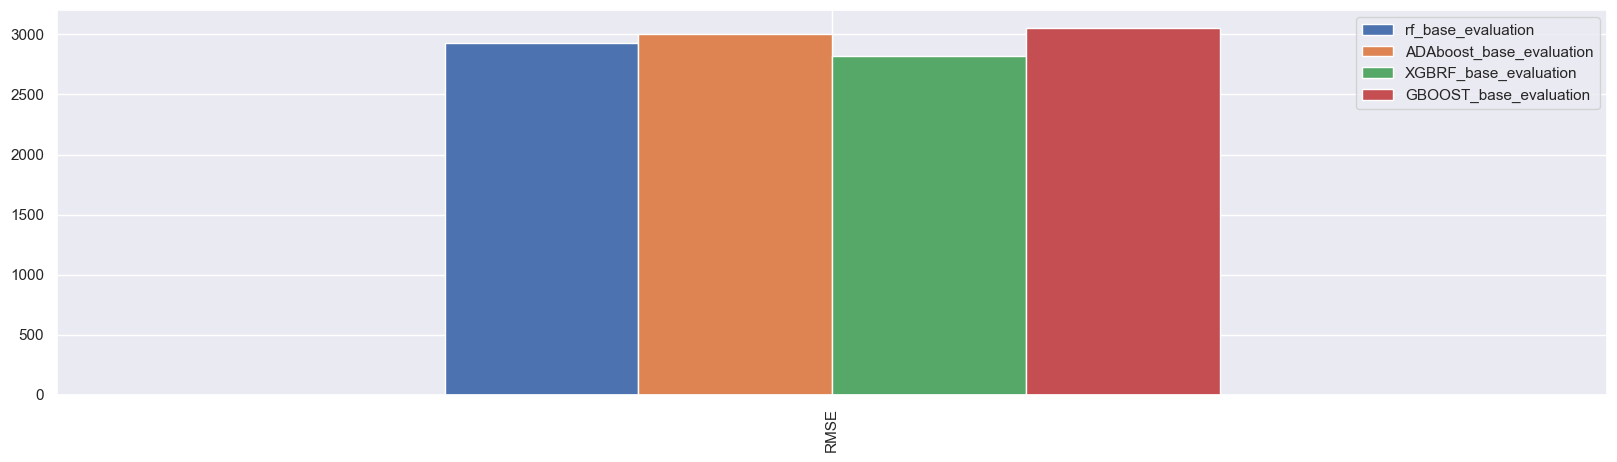

In [60]:
basemodels.plot(kind="bar",figsize=(20,5))

* *AdaBoostRegressor hyperparameter*

In [61]:
space=search_spaces["AdaBoostRegressor"]
def hyperparameter_tuning(space):
    clf = AdaBoostRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_AdaBoostRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)   

100%|██████████| 10/10 [00:08<00:00,  1.20trial/s, best loss: 2954.684]


* *GradientBoostingRegressor hyperparameter*

In [67]:
space=search_spaces["GradientBoostingRegressor"]
def hyperparameter_tuning(space):
    clf = GradientBoostingRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_GradientBoostingRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)  

100%|██████████| 10/10 [00:01<00:00,  5.02trial/s, best loss: 7501.033]


* *RandomForestRegressor hyperparameter*

In [75]:
space=search_spaces["RandomForestRegressor"]
def hyperparameter_tuning(space):
    clf = RandomForestRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_RandomForestRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)      

100%|██████████| 10/10 [00:05<00:00,  1.69trial/s, best loss: 7507.277]


* *XGBRFRegressor hyperparameter*

In [71]:
space=search_spaces["XGBRFRegressor"]
def hyperparameter_tuning(space):
    clf = XGBRFRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_XGBRFRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

100%|██████████| 10/10 [00:01<00:00,  5.91trial/s, best loss: 2979.517]


In [76]:
print("===========================================best_AdaBoostClassifier===========================================")
model = AdaBoostRegressor(**best_AdaBoostRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))
ADAboost_evaluation_preds=evaluation_preds(y_test,predicted) 
print("===========")

print("===========GradientBoostingRegressor===========")
model = GradientBoostingRegressor(**best_GradientBoostingRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))
GBOOST_evaluation_preds=evaluation_preds(y_test,predicted)  
print("===========")

print("===========XGBRFRegressor===========")
model = XGBRFRegressor(**best_XGBRFRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))
XGBRF_evaluation_preds=evaluation_preds(y_test,predicted)  
print("===========")

print("===========RandomForestRegressor===========")
model = RandomForestRegressor(**best_RandomForestRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))
RF_evaluation_preds=evaluation_preds(y_test,predicted)
print("=====================================================================")

===========================================best_AdaBoostClassifier===========================================
evaluation_preds :
 {'RMSE': np.float64(3973.081)}
===========GradientBoostingRegressor===========
evaluation_preds :
 {'RMSE': np.float64(7525.868)}
===========XGBRFRegressor===========
evaluation_preds :
 {'RMSE': np.float64(4357.19)}
===========RandomForestRegressor===========
evaluation_preds :
 {'RMSE': np.float64(7515.803)}


*Saving all best hyperopt param*

In [77]:
import json
# Serializing json
json_object = json.dumps({
    "best_AdaBoostRegressor" : best_AdaBoostRegressor,
    "best_GradientBoostingRegressor" :best_GradientBoostingRegressor,
    "best_RandomForestRegressor" :best_RandomForestRegressor,
    "best_XGBRFRegressor" :best_XGBRFRegressor}, indent=4,default=str)
 
# Writing to sample.json
with open("./outcomes/bestParams/price_regression_all_best_params.json", "w") as f:
    f.write(json_object)

*Saving all models evaluations*

In [78]:
import json
# Serializing json
json_object = json.dumps({"ADAboost_evaluation_preds" : ADAboost_evaluation_preds,
    "GBOOST_evaluation_preds" :GBOOST_evaluation_preds,
    "XGBRF_evaluation_preds" :XGBRF_evaluation_preds,
    "RF_evaluation_preds" :RF_evaluation_preds,
    "rf_base_evaluation":rf_base_evaluation,
    "ADAboost_base_evaluation":ADAboost_base_evaluation,
    "XGBRF_base_evaluation":XGBRF_base_evaluation,
    "GBOOST_base_evaluation":GBOOST_base_evaluation}, indent=4)
 
# Writing to sample.json
with open("./outcomes/modelsEvaluations/price_regression_all_best_params.json", "w") as f:
    f.write(json_object)

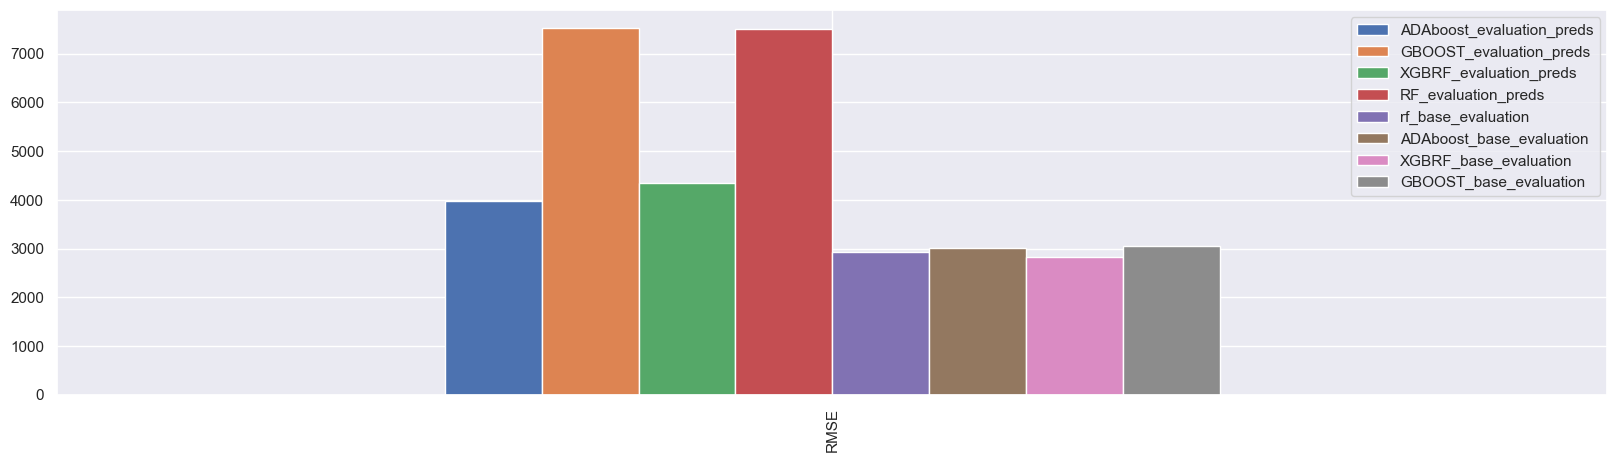

In [80]:
np.random.seed(42)
comparison=pd.DataFrame({
    "ADAboost_evaluation_preds" : ADAboost_evaluation_preds,
    "GBOOST_evaluation_preds" :GBOOST_evaluation_preds,
    "XGBRF_evaluation_preds" :XGBRF_evaluation_preds,
    "RF_evaluation_preds" :RF_evaluation_preds,
    "rf_base_evaluation":rf_base_evaluation,
    "ADAboost_base_evaluation":ADAboost_base_evaluation,
    "XGBRF_base_evaluation":XGBRF_base_evaluation,
    "GBOOST_base_evaluation":GBOOST_base_evaluation
})
comparison.plot(kind="bar",figsize=(20,5))
plt.savefig("./outcomes/modelsEvaluationsGraphs/price_EvaluationsGraph.png",dpi=500);

In [81]:
comparison

,ADAboost_evaluation_preds,GBOOST_evaluation_preds,XGBRF_evaluation_preds,RF_evaluation_preds,rf_base_evaluation,ADAboost_base_evaluation,XGBRF_base_evaluation,GBOOST_base_evaluation
RMSE,3973.081,7525.868,4357.19,7515.803,2930.234,3005.45,2821.177,3052.225


### *Final Result*

In [82]:
np.random.seed(42)
model = XGBRFRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)

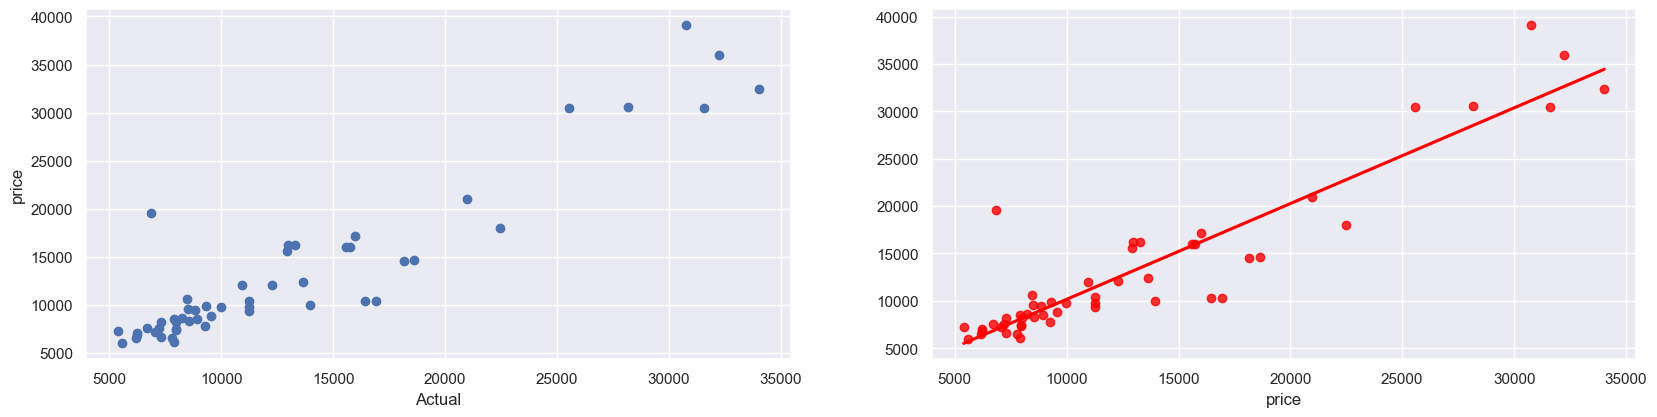

In [83]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

In [84]:
clf.feature_names=x.columns
importance=pd.concat([pd.DataFrame(clf.feature_names,columns=["feature_names"]),
           pd.DataFrame(clf.feature_importances_,columns=["feature_importances"])],axis=1)
importance

,feature_names,feature_importances
0,symboling,0.000625
1,normalized_losses,0.030118
2,make,0.014733
3,fuel_type,0.000000
4,aspiration,0.000298
5,num_of_doors,0.000507
6,body_style,0.008908
7,drive_wheels,0.000007
8,engine_location,0.000000
9,wheel_base,0.006523


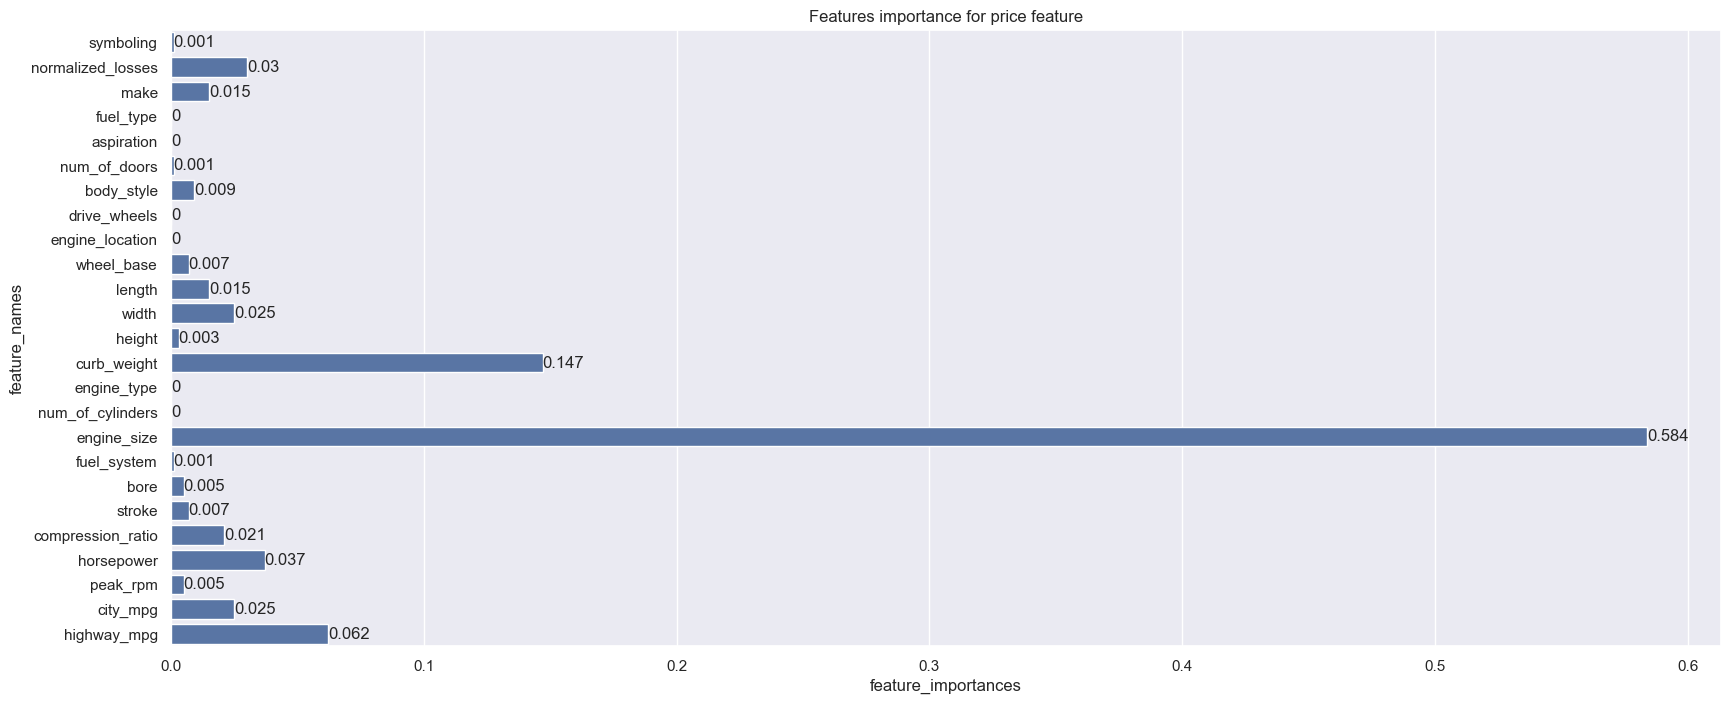

In [86]:
matplotlib.rcParams["figure.figsize"]=(20,8)
ax=sns.barplot(x=np.round(importance["feature_importances"],3),y=importance["feature_names"])
plt.title('Features importance for price feature')
ax.bar_label(ax.containers[0]);
plt.savefig("./outcomes/featuresImportanceGraphs/price_featureImportanc.png",dpi=500);

In [87]:
import pickle
with open ("./outcomes/bestModel/price_prediction_model.pkl","wb") as f:
    pickle.dump(clf,f)

---